# Russian Doll Envelopes problem question:
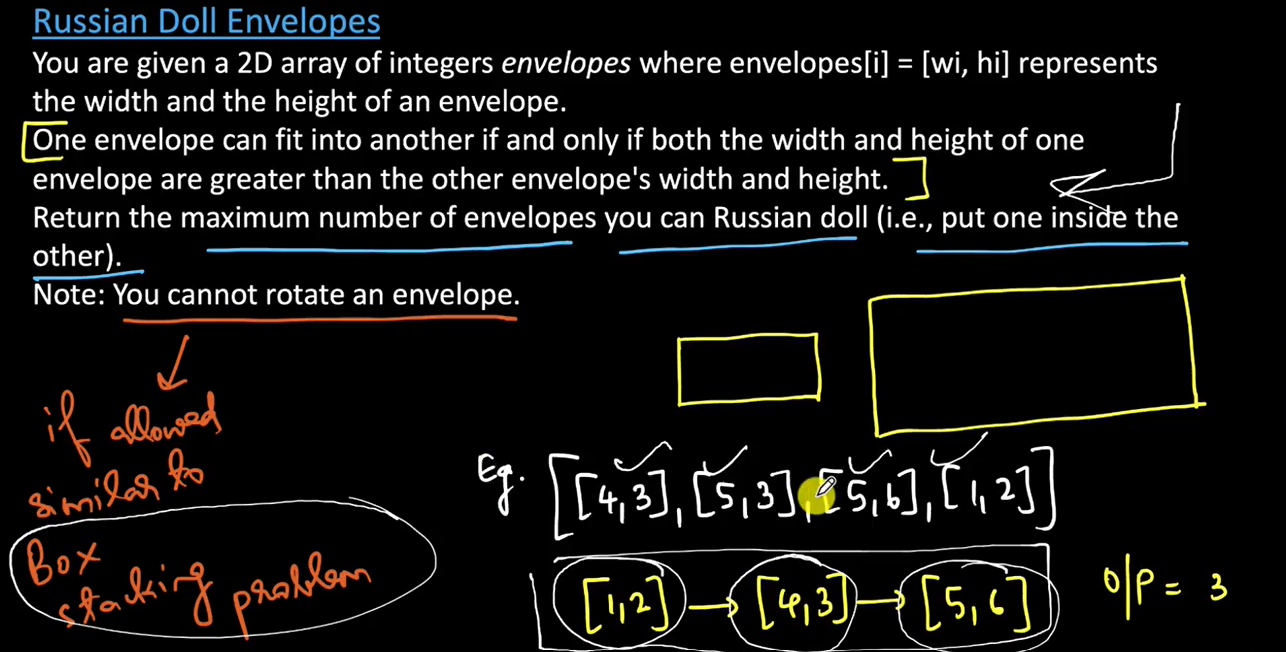
# Russian Doll Envelopes problem clarifying-question:
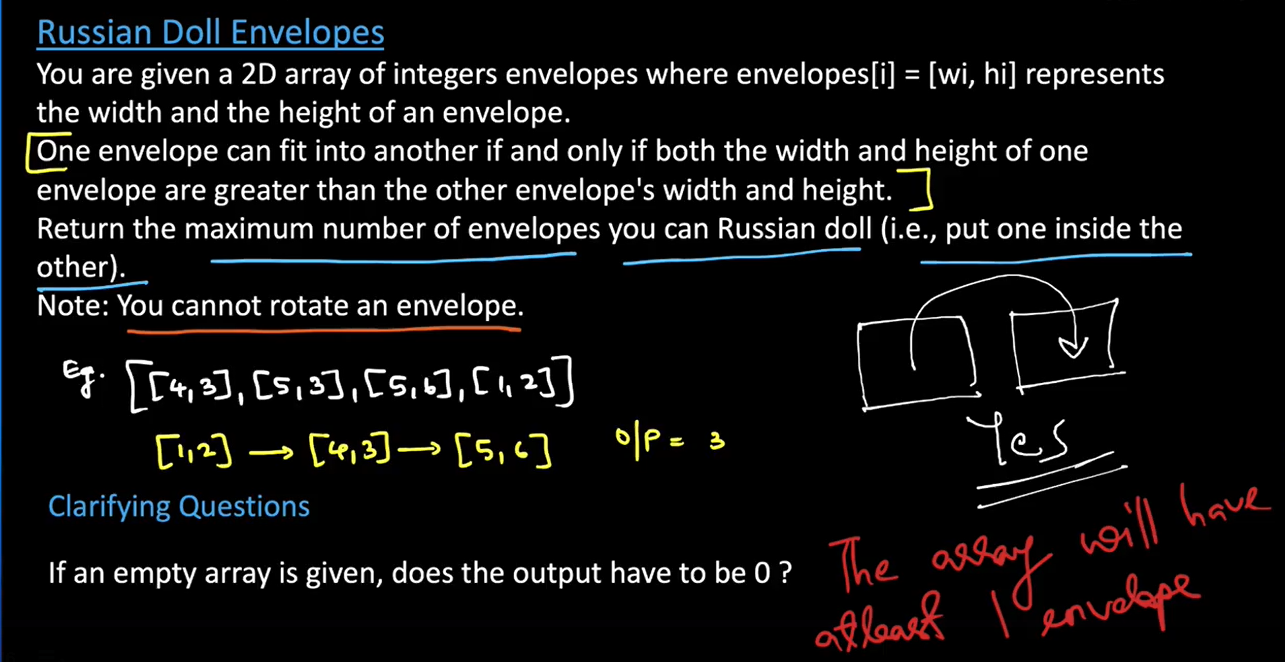
# Russian Doll Envelopes problem [How's this problem has DP features]:
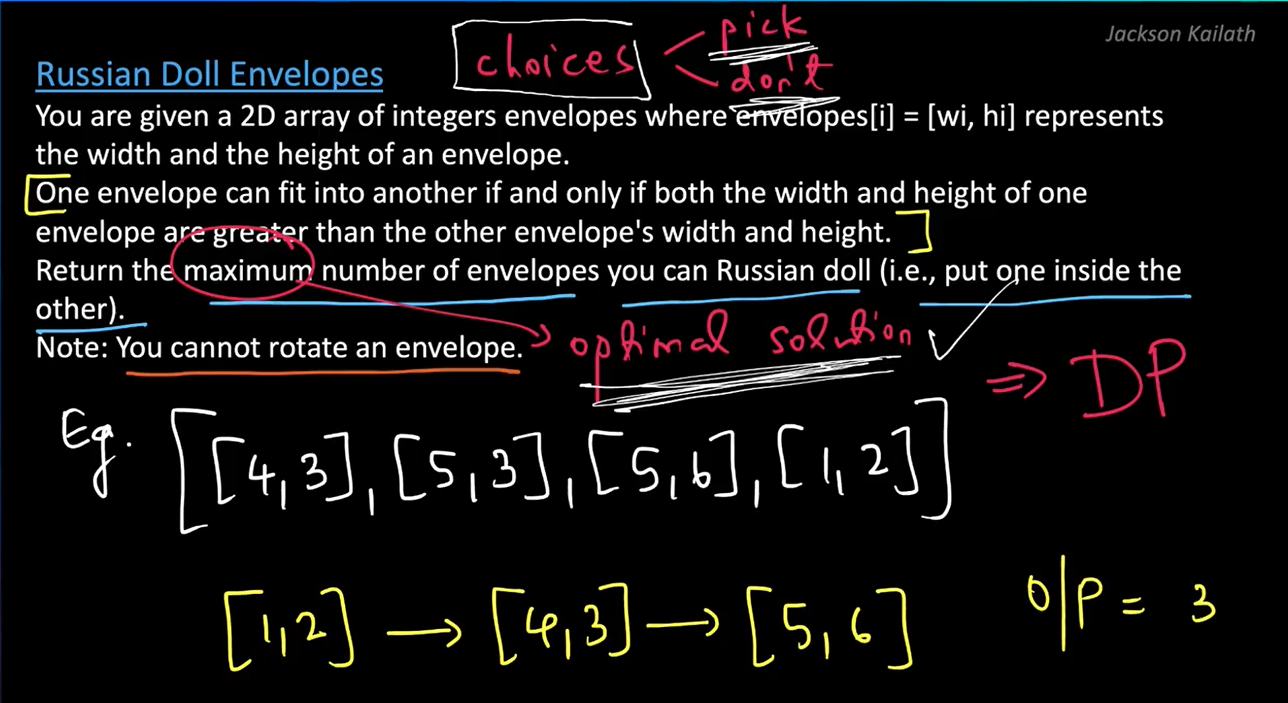
# Russian Doll Envelopes problem statement:

### You are given a 2D array of integers envelopes where envelopes[i] = [wi, hi] represents the width and the height of an envelope.

### One envelope can fit into another if and only if both the width and height of one envelope are greater than the other envelope's width and height.

### Return the maximum number of envelopes you can Russian doll (i.e., put one inside the other).

- Note: You cannot rotate an envelope.

### Example :

- Input: envelopes = [[6,5],[7,5],[7,8],[3,4]]
- Output: 3
### Explanation: The maximum number of envelopes you can Russian doll is 3 ([3,4] => [6,5] => [7,8]).

# Russian Doll Envelopes problem[approach: we can use either 1-d dp (tabulation) or Binary-search approach]:
### Intuition arroud approach for solving this specific question :- 
### first we will sort the array of pairs based on 1st-element (which's width attribute of a given problem here.)
### secondly after sorting we will apply the LIS-algorithm (here we're going to apply either tabulation or Binary-search approach of LIS) on second element (which's height attribute of given problem here)

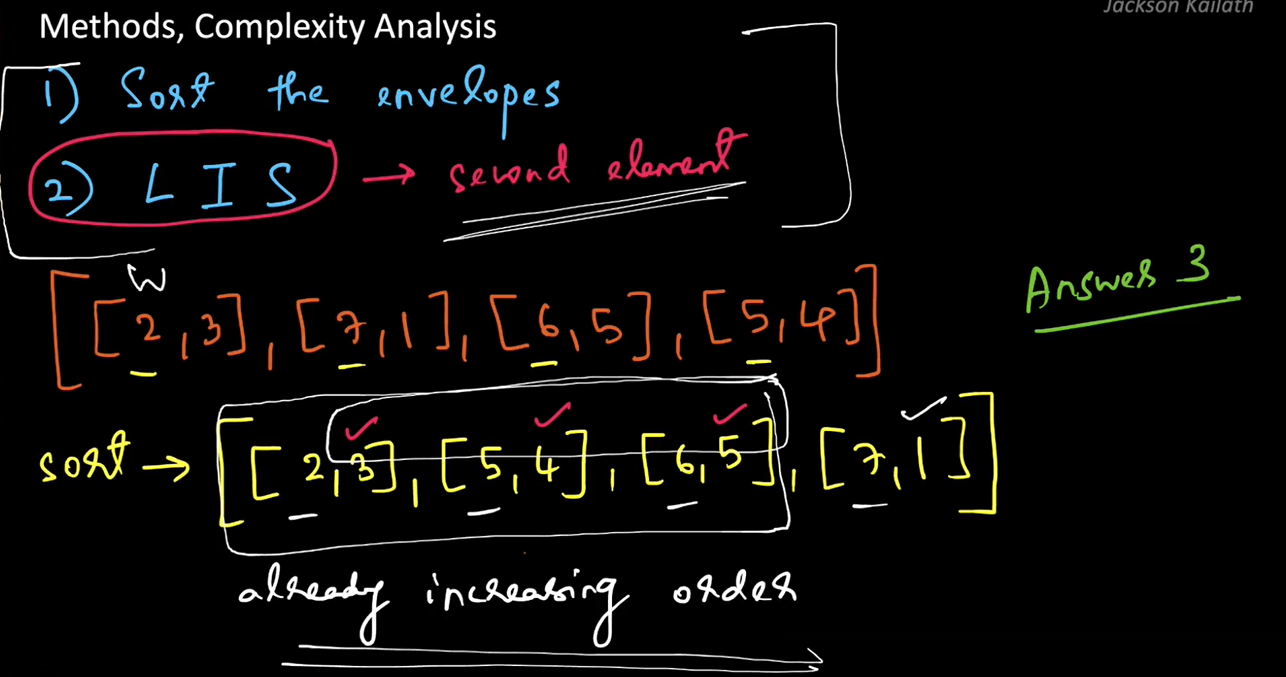
### there're probably the cases where even after sorting the array of pairs we might encountered the adjacent pair with same width 
### so how can we handle this kind of situation ; we can handle using either of these two methods:
### method-1 : after sorting the array of pairs based on width(1st element) in ascennding-order , and applying LIS-algo over (height)2nd element by including the approapiate pair for forming LIS , but before including the pair we should compare the 1st-index[Height] as well as 0-index[width] of the pairs before including for forming LIS : h1 > h2 & w1 > w2   then include [w1,h1] pairs wehre w2 ,h2 width and height of previously included pair.

### method-2 : while sorting the array of pairs based on 1st-element(width) in ascending-order and if some pair has same width then for those pair we should sort them out based on 2nd-element(height) in descending order. then we can apply LIS algo on second-elements of pair simply.
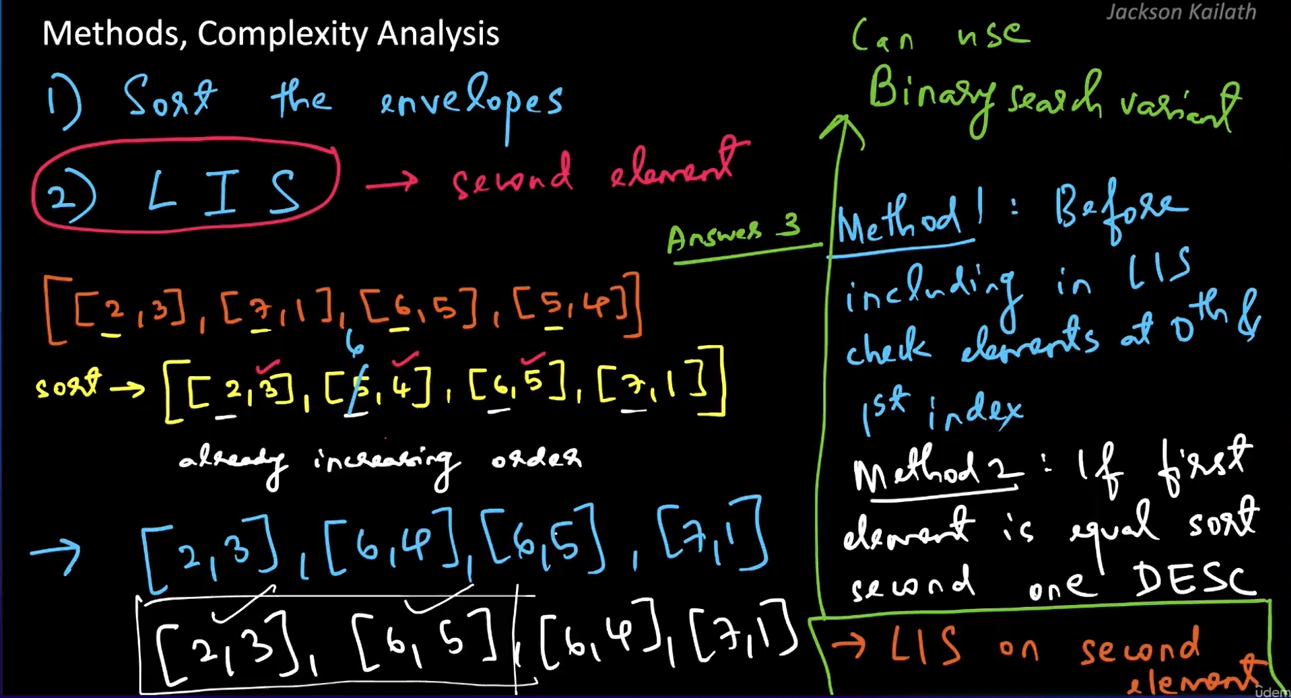

# Russian Doll Envelopes problem[approach: we can use either 1-d dp (tabulation) or Binary-search approach] Complexity-analysis:

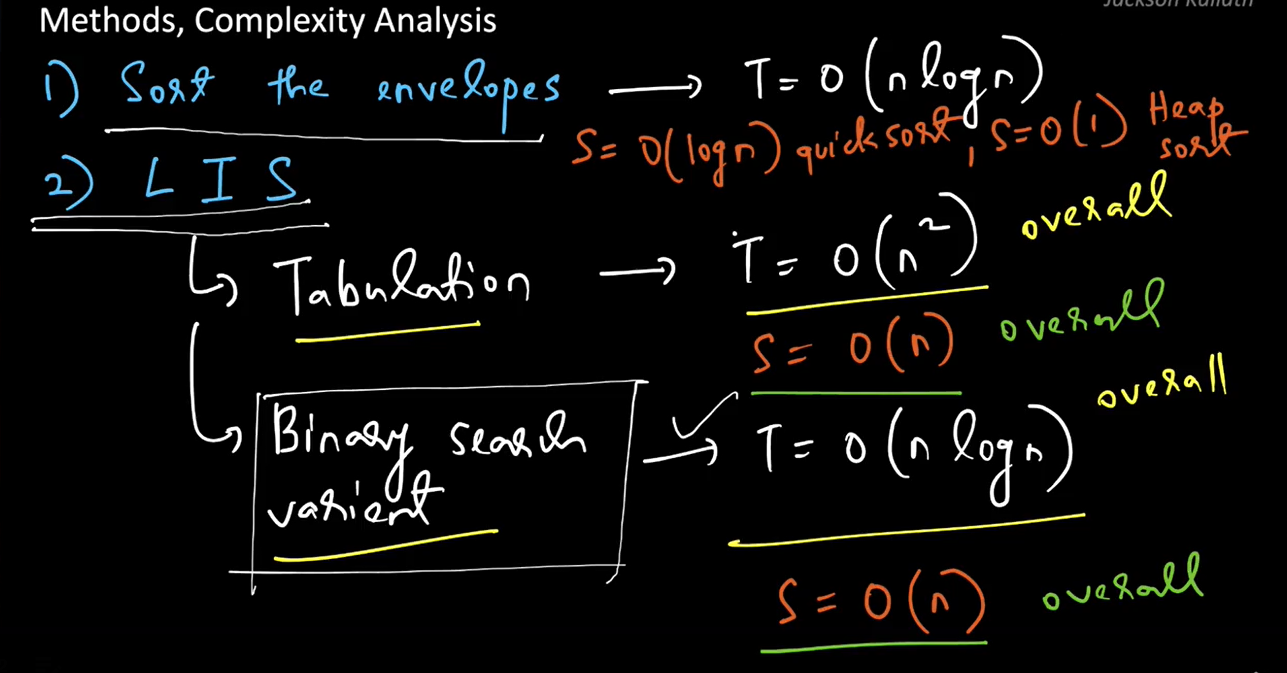

# Russian Doll Envelopes problem[approach:1-d dp (tabulation)] Code-implementation:
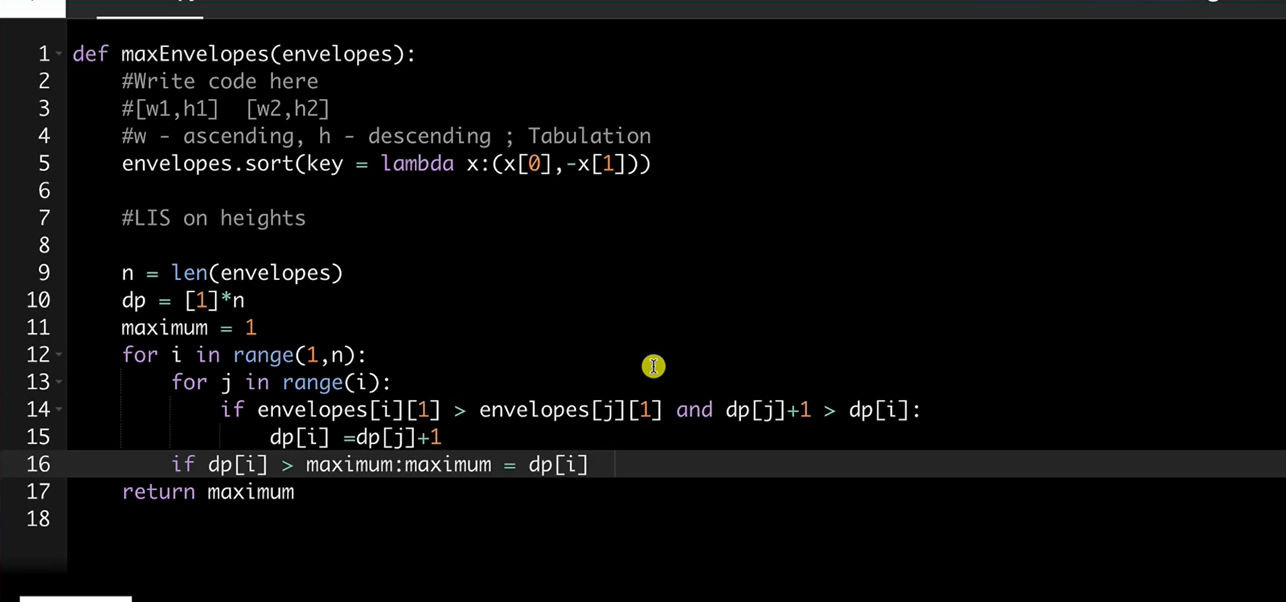

In [2]:
# code implementation of 1-d dp_talbe (tabulation) approach for solving the RussainDoll_envelopes problem :

def maxEnvelopes(envelopes):
    #first of all here we sort-out the envelopes based on 1st-element(width) in ascending order and descending order based on 2nd-element(height)
    #// using method-1 for resolving the probabilities of getting adjacent pair with  same width but using this method they have diffrent height in desceding order. 
    envelopes.sort(key = lambda x:(x[0],-x[1]))   
    # x[0] for ascending order based on 1st-ele of pair 
    # -x[1] for descending order based on 2nd-ele of pair 
    
    #applying LIS(1-d dp_table Tabulation approach)algo on height elements of pair 
    n = len(envelopes)  # length of array of pairs  //total number of envolopes
    dp = [1]*n # 1-d dp_table intitalised with '1' in all cells 
    max = 1  # as we intialised above 1-d dp_table with '1' so here we also initialised max =1 for comparison purpose
    for i in range(1,n): # i from 1 to n 
        for j in range(i): # j will be goes from zero upto the i only   [for each instance or iteration of i] 
            if envelopes[i][1] > envelopes[j][1]  and dp[j]+1 > dp[i] : # comparing: the height of ongoing pair should be greater than height of last-included pairs 
                                                            # alongwith checking dp[j]+1 > dp[i]  
                dp[i] = dp[j]+1 # then update dp_table value at index-i with dp[j]+1
 #now after filling up and updating each value at dp[i] iteratively , for that each instance we have to update max-value to the current value at dp[i] if its greater than previous max-value
        if dp[i] > max:
            max = dp[i]   # updating max-value to the new value at dp[i]
    return max   # will return the final max-value from dp_table; as that will be the maximum number of envolopes that we can put inside other     

envp = [[6,5],[7,5],[7,8],[3,4]]
print(maxEnvelopes(envp))  # should be 3            

3


In [3]:
# code implementation of binary-search approach for solving the RussainDoll_envelopes problem :

def maxEnvelopes(envelopes):
    #first of all here we sort-out the envelopes based on 1st-element(width) in ascending order and descending order based on 2nd-element(height)
    #// using method-1 for resolving the probabilities of getting adjacent pair with  same width but using this method they have diffrent height in desceding order. 
    envelopes.sort(key = lambda x:(x[0],-x[1]))   
    # x[0] for ascending order based on 1st-ele of pair 
    # -x[1] for descending order based on 2nd-ele of pair 
    
    n = len(envelopes)  # length of array of pairs  //total number of envolopes
    sub = [envelopes[0][1]]  # intialised sub-sequence so far array with height of first envelope included already 
# binary search-fn used for searching pair with least-height and hieght greater than height of num-pair  
    def binary_search(sub,num):  # binary search-fn  taking subsequnce_so_far and num as arguments
        left, right = 0,len(sub)   # left and right -idex 
        while left<right:    # lopp continuews untill unless the left and right index  cross each other 
            mid = (left+right)//2   # calculating mid 
            if num>sub[mid]:    # comparing: if  mid less than num    
                left = mid+1   # move left-index to mid+1
            else:
                right = mid # else move right-index to the mid 
        return left  # return either left or right -index [does'nt much matter in the end ]

    for i in range(1,n):   #  lopp form 1 to n 
        num = envelopes[i][1]  # num will be the height of the current pair 
        if num>sub[-1]:   # num(height of current pair) is greater than previosly included pair's height   
            sub.append(num) #then include this current pair to subsequence_so_far
        else:  # else we go for finding out least height-pair which has height greater than height of curent(num) pair, in the subsequnce_so_far  
            x = binary_search(sub,num)  # saving index of that least-hieght pair in x variable here  
            sub[x]=num  #then substitute/replace that leaat-height pair on subsequnce_so_far with curr-pair (num) 
    return len(sub)  # returnung the length of complete subsequence that will be the maximum number of pairs(or envelopes) which can be put inside other                 
#example usage:
envp = [[6,5],[7,5],[7,8],[3,4]]
print(maxEnvelopes(envp))  # should be 3

3
